# 第二章 基础二维图
## 2.11 二维流场图


In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
# 新增
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## 生成速度场数据

因为Nature等高水平期刊上的同类插图，数据难以获得。本节课的示例数据将用著名的物理现象的解析解直接生成流场数据。利用[Van der Pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)的解析解生成相应的速度场

### 基本参数介绍

* [streamplot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.streamplot.html#matplotlib.axes.Axes.streamplot)

```python
Axes.streamplot(axes, x, y, u, v, density=1, linewidth=None, color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', minlength=0.1, transform=None, zorder=None, start_points=None, maxlength=4.0, integration_direction='both', *, data=None)
```

* [quiver](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.quiver.html#matplotlib.axes.Axes.quiver)

```python
quiver([X, Y], U, V, [C], **kw)
```

In [2]:
def genVelocity(m,x,y):
    U=m*(x - 1/3.1*x**3 - y)
    V=x/m
    return U,V

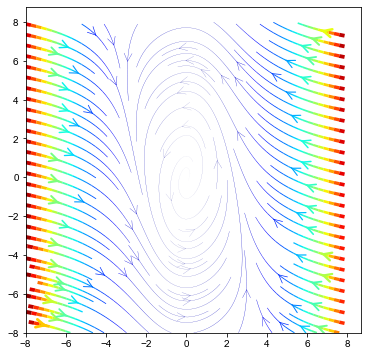

In [55]:
l=8
n=100
mu=0.5
x=np.linspace(-l,l,n)
y=np.linspace(-l,l,n)
X,Y=np.meshgrid(x,y)
U,V=genVelocity(mu,X,Y)
vel=(U**2+V**2)**0.5
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
ax.streamplot(X,Y,U,V,density=(1,2),color=vel,cmap='jet',arrowsize=2,arrowstyle='->',linewidth=4*vel/np.max(vel))

plt.show()

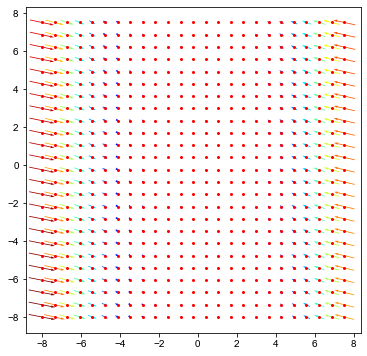

In [56]:
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
interval=4
skip=(slice(None, None, interval),slice(None, None, interval))
ax.quiver(X[skip],Y[skip],U[skip],V[skip],vel[skip],cmap='jet',units='xy',scale=60,pivot='mid')
ax.scatter(X[skip],Y[skip],s=4,color='r')
plt.show()

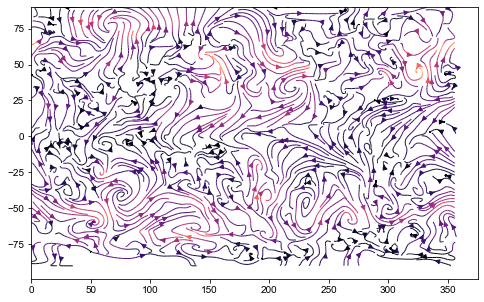

In [64]:
# 1. 读取nc
data=Dataset('data/streamplot/globalWind.nc')
# print(data.variables) #查看变量
lon=data.variables['longitude'][:]
lat=data.variables['latitude'][:]
u=data.variables['u100'][:]
v=data.variables['v100'][:]
# print(U.shape,V.shape,lon.shape,lat.shape)
U=u.reshape((u.shape[1], u.shape[2]))
V=v.reshape((v.shape[1], v.shape[2]))
# print(U.shape,V.shape,lon.shape,lat.shape)
interval=10
skip=(slice(None, None, interval),slice(None, None, interval))
# 构建网格
X, Y = np.meshgrid(lon, lat)
vel=(U**2+V**2)**0.5
fig=plt.figure(figsize=(8,5))
ax=plt.gca()
ax.streamplot(X[skip],Y[skip],U[skip],V[skip],density=3,color=vel[skip],cmap='magma',linewidth=1)

plt.show()